In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
astros = pd.read_csv('/Users/tylersmith/Desktop/STAT386/semester_project/astros.csv')
astros

,Gm#,Date,Tm,Opp,W/L,R,RA,Inn,W-L,Rank,...,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Season,Time_minutes
0,1,"Thursday, Mar 30",HOU,CHW,L,2,3,9.0,0-1,4,...,Graveman,Pressly,López,2:38,N,43032.0,0.92,-,2023,158
1,2,"Friday, Mar 31",HOU,CHW,W,6,3,9.0,1-1,3,...,Martinez,Graveman,Montero,2:40,N,41453.0,0.92,+,2023,160
2,3,"Saturday, Apr 1",HOU,CHW,W,6,4,9.0,2-1,2,...,Stanek,Kelly,Neris,3:11,D,37519.0,0.93,++,2023,191
3,4,"Sunday, Apr 2",HOU,CHW,L,3,6,9.0,2-2,3,...,Clevinger,Garcia,NaN,3:06,D,42835.0,1.00,-,2023,186
4,5,"Monday, Apr 3",HOU,DET,L,6,7,11.0,2-3,3,...,Wingenter,Neris,Hill,3:21,N,29272.0,0.93,--,2023,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,158,"Wednesday, Sep 27",HOU,TEX,W,12,2,9.0,98-60,1,...,Verlander,Martinez,NaN,3:17,D,26053.0,0.18,+++,2017,197
1028,159,"Thursday, Sep 28",HOU,BOS,W,12,2,9.0,99-60,1,...,Peacock,Rodriguez,NaN,3:31,N,34222.0,0.10,++++,2017,211
1029,160,"Friday, Sep 29",HOU,BOS,W,3,2,9.0,100-60,1,...,Morton,Fister,Giles,2:47,N,36623.0,0.07,+++++,2017,167
1030,161,"Saturday, Sep 30",HOU,BOS,L,3,6,9.0,100-61,1,...,Pomeranz,McCullers,NaN,3:19,D,35722.0,0.14,-,2017,199


In [3]:
astros.dtypes

Gm#               int64
Date             object
Tm               object
Opp              object
W/L              object
R                 int64
RA                int64
Inn             float64
W-L              object
Rank              int64
GB               object
Win              object
Loss             object
Save             object
Time             object
D/N              object
Attendance      float64
cLI             float64
Streak           object
Season            int64
Time_minutes      int64
dtype: object

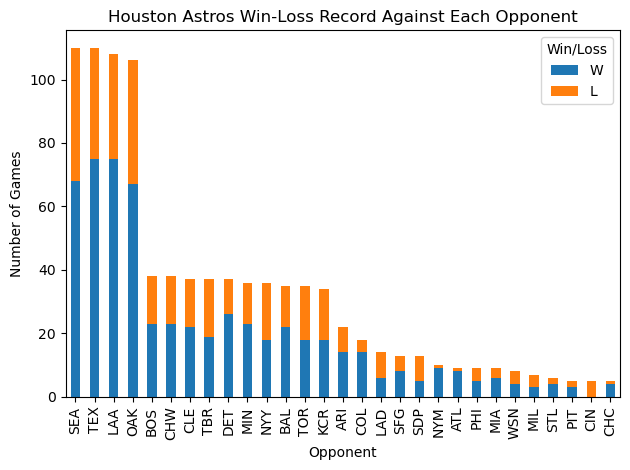

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate win-loss counts
win_loss_counts = astros.groupby(['Opp', 'W/L']).size().unstack(fill_value=0)

# Add a new column for total games played against each opponent
win_loss_counts['Total_Games'] = win_loss_counts['W'] + win_loss_counts['L']

# Sort by total games in descending order
win_loss_counts = win_loss_counts.sort_values(by='Total_Games', ascending=False)

# Plotting the sorted win-loss counts
win_loss_counts[['W', 'L']].plot(kind='bar', stacked=True)
plt.title('Houston Astros Win-Loss Record Against Each Opponent')
plt.xlabel('Opponent')
plt.ylabel('Number of Games')
plt.legend(title='Win/Loss')
plt.tight_layout()  # Adjust layout to fit the plot
plt.savefig('houston_astros_win_loss_record.png') # Save the figure
plt.show()


In [5]:
# Perform the groupby operation and ensure 'W' and 'L' are present
win_loss_counts = astros.groupby('Opp')['W/L'].value_counts().unstack(fill_value=0)[['W', 'L']]

# Calculate win percentage
win_loss_counts['Win_Percentage'] = win_loss_counts['W'] / (win_loss_counts['W'] + win_loss_counts['L'])

# Sort by win percentage
win_loss_counts = win_loss_counts.sort_values(by='Win_Percentage', ascending=False)


In [6]:
# Perform the groupby operation and ensure 'W' and 'L' are present
win_loss_counts = astros.groupby('Opp')['W/L'].value_counts().unstack(fill_value=0)[['W', 'L']]

# Calculate win percentage
win_loss_counts['Win_Percentage'] = win_loss_counts['W'] / (win_loss_counts['W'] + win_loss_counts['L'])

# Sort by win percentage
win_loss_counts = win_loss_counts.sort_values(by='Win_Percentage', ascending=False)
win_loss_counts



W/L,W,L,Win_Percentage
Opp,,,
NYM,9,1,0.900000
ATL,8,1,0.888889
CHC,4,1,0.800000
COL,14,4,0.777778
DET,26,11,0.702703
LAA,75,33,0.694444
TEX,75,35,0.681818
STL,4,2,0.666667
MIA,6,3,0.666667


In [7]:
astros.value_counts('W/L')

W/L
W     590
L     360
L*     41
W*     41
dtype: int64

In [8]:
# Calculate total wins and losses (including walk-offs)
total_wins = (astros['W/L'] == 'W').sum() + (astros['W/L'] == 'W*').sum()
total_losses = (astros['W/L'] == 'L').sum() + (astros['W/L'] == 'L*').sum()

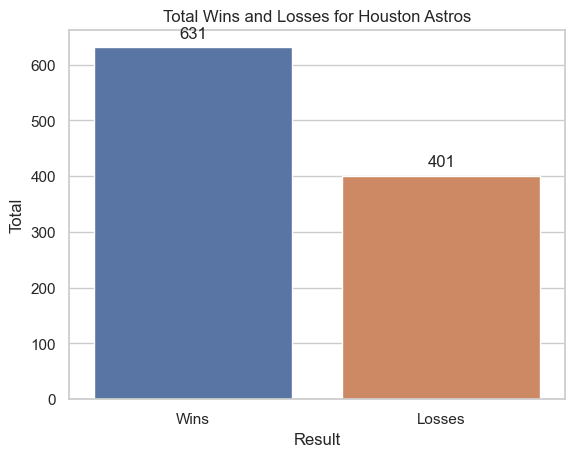

In [9]:

data = {
    'Result': ['Wins', 'Losses'],
    'Total': [total_wins, total_losses]
}
results_df = pd.DataFrame(data)

# Now let's create the bar plot
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Result', y='Total', data=results_df)

# Optional: Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Total Wins and Losses for Houston Astros')
plt.show()


In [10]:
win_percentage = round(total_wins / (total_wins + total_losses),3)
win_percentage

0.611

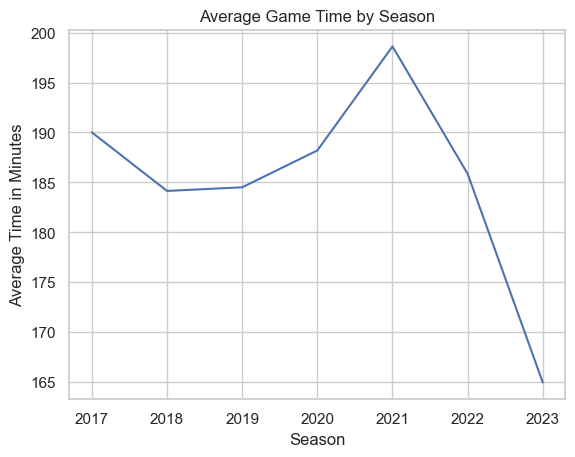

In [11]:
# Calculate the average time in minutes for each season
average_time_by_season = astros.groupby('Season')['Time_minutes'].mean().reset_index()

# Create a line chart with Seaborn
sns.lineplot(data=average_time_by_season, x='Season', y='Time_minutes')

# Label your axes and give a title to the plot
plt.xlabel('Season')
plt.ylabel('Average Time in Minutes')
plt.title('Average Game Time by Season')

# Display the plot
plt.show()

In [12]:
# Reset index to turn 'Opp' back into a column
win_loss_counts = win_loss_counts.reset_index()

# Define a dictionary where the keys are division names and the values are lists of team abbreviations.
divisions_to_teams = {
    'AL East': ['NYY', 'BAL', 'TOR', 'BOS', 'TB'],
    'AL Central': ['CLE', 'DET', 'CHW', 'KCR', 'MIN'],
    'AL West': ['HOU', 'LAA', 'OAK', 'SEA', 'TEX'],
    'NL East': ['NYM', 'ATL', 'MIA', 'PHI', 'WSN'],
    'NL Central': ['CHC', 'MIL', 'CIN', 'PIT', 'STL'],
    'NL West': ['LAD', 'SDP', 'SFG', 'COL', 'ARI']
    # ... add other divisions and their teams
}

# Reverse the mapping: create a dictionary with team abbreviations as keys and their divisions as values.
team_to_division_mapping = {team: division for division, teams in divisions_to_teams.items() for team in teams}

# Use the new mapping with the map function.
win_loss_counts['Division'] = win_loss_counts['Opp'].map(team_to_division_mapping)

# Group by the new Division column
division_group = win_loss_counts.groupby('Division').sum()

# Calculate win percentage for each division
division_group['Win_Percentage'] = division_group['W'] / (division_group['W'] + division_group['L'])

# Print the win percentage for each division
print(division_group[['W', 'L', 'Win_Percentage']])





W/L           W    L  Win_Percentage
Division                            
AL Central  112   70        0.615385
AL East      81   63        0.562500
AL West     285  149        0.656682
NL Central   14   14        0.500000
NL East      32   13        0.711111
NL West      47   33        0.587500


/var/folders/sx/239lgvxx1yn2qrq3szxf8q380000gn/T/ipykernel_35342/2914691629.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  division_group = win_loss_counts.groupby('Division').sum()


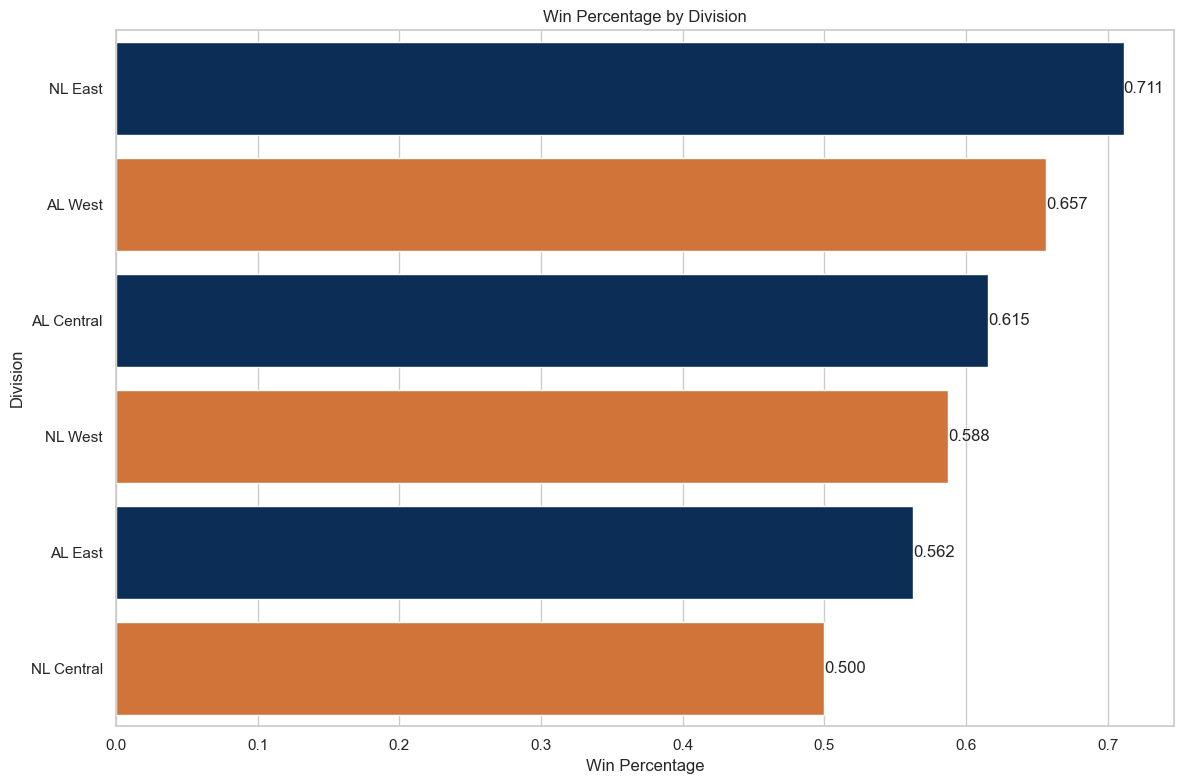

In [13]:
# Reset the index of the division_group DataFrame to make 'Division' a column again
division_group = division_group.reset_index()

# Sort the DataFrame by 'Win_Percentage' from highest to lowest
division_group_sorted = division_group.sort_values('Win_Percentage', ascending=False)

# Create a horizontal bar plot with Astros colors
plt.figure(figsize=(12, 8))  # Increase the figure size
barplot = sns.barplot(x='Win_Percentage', y='Division', data=division_group_sorted, palette=['#002D62', '#EB6E1F'])

# Add title and labels
plt.title('Win Percentage by Division')
plt.xlabel('Win Percentage')
plt.ylabel('Division')

# Annotate each bar with the value of the win percentage
for p in barplot.patches:
    width = p.get_width()  # get the width of each bar
    plt.text(width if width > 0.01 else 0.01,  # position text slightly right of the bar's end if width is greater than 0.01
             p.get_y() + p.get_height() / 2,  # position text at the center height of the bar
             f'{width:.3f}',  # format text with 3 decimal places
             ha = 'left', va = 'center')  # align the text to the left

# Display the plot
plt.tight_layout()  # Adjust the plot to make sure everything fits without overlapping
plt.show()


